# Importing Packages & Set Up Data Layout

## Preprocessing Information for the Given Data.

A high-pass filter with a 30 Hz cut-off frequency and a power line notch filter (50 Hz) were used. All recordings are artifact-free EEG segments of 60 seconds duration. At the stage of data preprocessing, the Independent Component Analysis (ICA) was used to eliminate the artifacts (eyes, muscle, and cardiac overlapping of the cardiac pulsation). The arithmetic task was the serial subtraction of two numbers. Each trial started with the communication orally 4-digit (minuend) and 2-digit (subtrahend) numbers (e.g. 3141 and 42).

In [1]:
# Let's load some packages we need (pip install mne)
import mne
import mne.viz
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from mne.channels import make_standard_montage
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
# ! pip install mne

# Read raw data files where each file contains a run
files = ['../datasets/HW2Datasets/Subject06_1.edf', '../datasets/HW2Datasets/Subject06_2.edf', '../datasets/HW2Datasets/Subject07_1.edf', '../datasets/HW2Datasets/Subject07_2.edf']

# Read the raw EDF files into an array
raws = [read_raw_edf(f, preload=True) for f in files]

# Loop through the array and make the following changes to the raw files
for raw in raws:

    # Rename the raw channels
    raw.rename_channels({'EEG F3':'F3', 'EEG F4':'F4',
                            'EEG Fp1':'Fp1', 'EEG Fp2':'Fp2', 'EEG F7':'F7', 'EEG F8':'F8',
                            'EEG T3':'T3', 'EEG T4':'T4', 'EEG C3':'C3', 'EEG C4':'C4',
                            'EEG T5':'T5', 'EEG T6':'T6', 'EEG P3':'P3', 'EEG P4':'P4',
                            'EEG O1':'O1', 'EEG O2':'O2', 'EEG Fz':'Fz', 'EEG Cz':'Cz',
                            'EEG Pz':'Pz', 'EEG A2-A1':'A2', 'ECG ECG':'ECG'})


    # Set channel types
    raw.set_channel_types({'ECG':'ecg'})

    # Define the channel locations
    raw.set_montage(mne.channels.make_standard_montage('standard_1020'))

    # Print Raw Channel Names for double checking
    print(raw.ch_names)

# Rename the raws with more insightfull names
subject6_background = raws[0] # Subject 6 background raw
subject6_task = raws[1] # Subject 6 task raw
subject7_background = raws[2] # Subject 7 background raw
subject7_task = raws[3] # Subject 7 task raw

Extracting EDF parameters from e:\Other\Schoo\NeuralDataScience\Neural-Data-Science\datasets\HW2Datasets\Subject06_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from e:\Other\Schoo\NeuralDataScience\Neural-Data-Science\datasets\HW2Datasets\Subject06_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from e:\Other\Schoo\NeuralDataScience\Neural-Data-Science\datasets\HW2Datasets\Subject07_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from e:\Other\Schoo\NeuralDataScience\Neural-Data-Science\datasets\HW2Datasets\Subject07_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Read

# Q1)

## Plot the power spectral density for the two conditions (background and task). Discuss the main difference between the two groups.

For this task, I have ploted 4 power spectral density plots for each of the subjects and states along with a custom mean spectral density plot to better see some overall occuring trends.

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


c:\Users\Wise\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


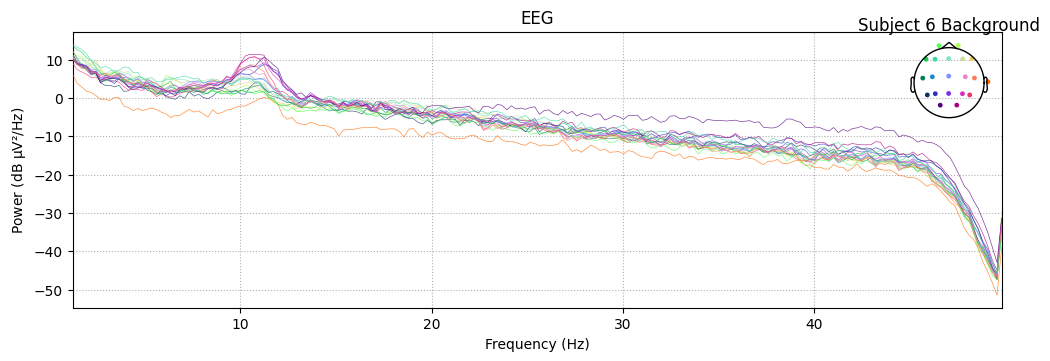

In [2]:
# Plot Subject 6 Background between 1hz and 50hz
subject6_background.plot_psd(fmin=1, fmax=50)
plt.title('Subject 6 Background') # Set Title for easier interpretation
plt.show() # Show plot

The plot above (subject 6 background state) is one that has a mini ramp up in power at frequency 12hz or so. Another thing to mention is that most of the channels near the frontal lobe (left dominant) are occupied from frequencies 1hz to around 8hz and then it flips to a primarly occipital lobe (right dominant) occupied from frequencies 8hz to around 14hz. After that there is no noticeably active area all relatively equal from 14hz to the end (50hz here) besides a purple channel (occipital lobe) becomes more powerful compared to the rest. Also last thing to mention here, the orange channel is way weaker than the other signals and could be because it's on the side of the head where it's harder to read the signal.

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


c:\Users\Wise\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


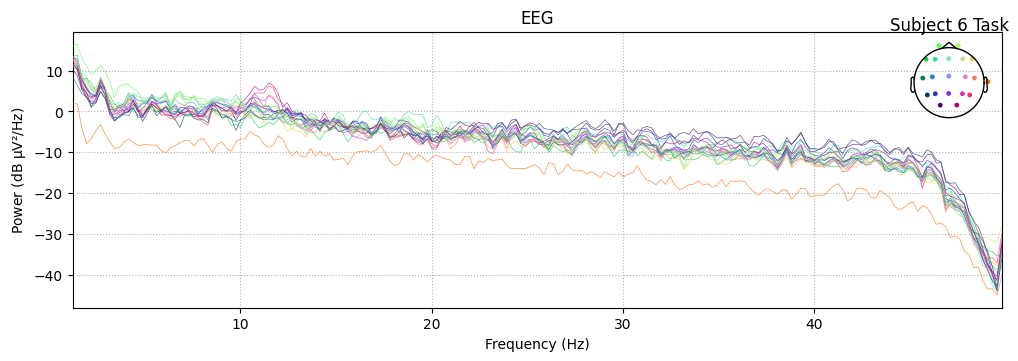

In [3]:
# Plot Subject 6 Task between 1hz and 50hz
subject6_task.plot_psd(fmin=1, fmax=50)
plt.title('Subject 6 Task') # Set Title for easier interpretation
plt.show() # Show plot

The plot above (subject 6 test state) also has a mini ramp up near 12hz, however the power of that ramp up is less in this plot vs the previous one (10dB to 6dB) potentially indecating a lower usage of the occipital lobe. The Frontal lobe (left dominant) from before grows in it's relative power from 1hz to 10hz over the other channels and the other channels (purple, red, dark blue) even condense down, becoming more dense under the the Frontal lobe lines (green & cyan colors). The dominance of the Frontal lobe continues right after the mini ramp up after around 12hz to 22hz or so, but less so in comparison to the 1hz to 10hz area. Another very important thing to mention is the fact that the power of higher frequencies is greater on average in the task plot than on the background plot, showing more energy being needed in the brain to solve the task. We can see this by looking at 30hz (Task: -5dB to -10dB vs Background: -8dB to -11dB) & 40hz (Task: -8B to -12dB vs Background: -12 to -18db). Amplitude also seems to be higher on the task vs the background state.

This tells us that the task given (solving math problems) activates more areas in the frontal lobe in comparison to other areas of the brain and more importantly, require more energy in all areas of the brain in general. This makes sense due to studies showing us that the frontal lobe is critial for complex problem solving and that it takes energy to make a computation.

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


c:\Users\Wise\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


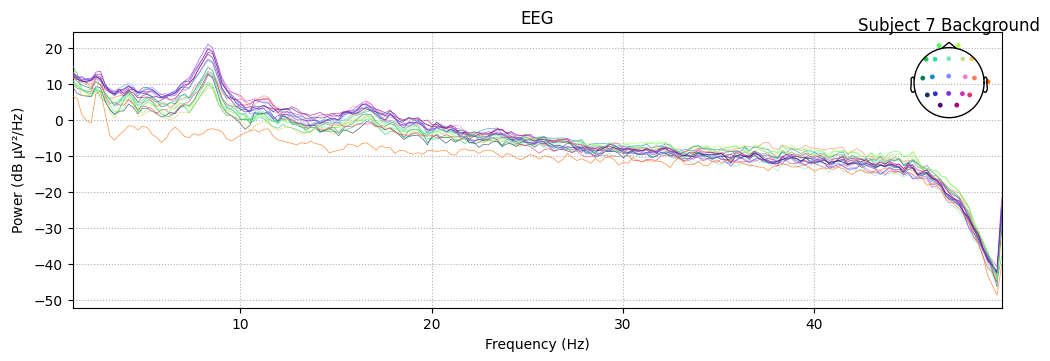

In [12]:
# Plot Subject 7 Background between 1hz and 50hz
subject7_background.plot_psd(fmin=1, fmax=50)
plt.title('Subject 7 Background') # Set Title for easier interpretation
plt.show() # Show plot

The plot above (subject 7 background state) is similar to subject 6 background state outside of the fact that the Occipital lobe (right dominant) is the most powerful section from 1hz to 25hz or so and that the small hump happens at around 7hz to 8hz at 20dB. Also from 26hz+, the dominant channels seem to be from the Frontal lobe (lime & yellow).

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


c:\Users\Wise\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


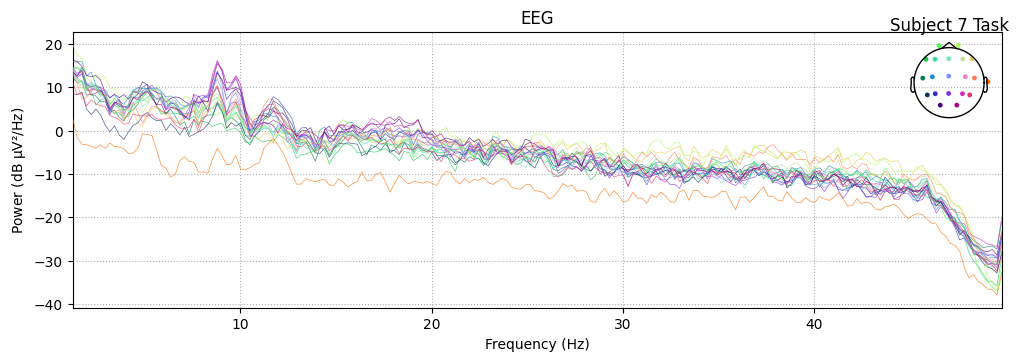

In [11]:
# Plot Subject 7 Task between 1hz and 50hz
subject7_task.plot_psd(fmin=1, fmax=50)
plt.title('Subject 7 Task') # Set Title for easier interpretation
plt.show() # Show plot

The plot above (subject 7 task state) shows a decrease in the hump that was at around 8hz to 15dB from 20dB, similar decrease to what subject 6 had. Also compared to background for this subject the amount of power comming from the Frontal lobe (green, cyan, & yellow) seems to be increased from 1hz to 10hz. After 25hz we see an increase in lime and yellow colors way above the other chanels, so Frontal lobe (right dominant) clearly emmiting more power than the other channels.

Effective window size : 4.096 (s)


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


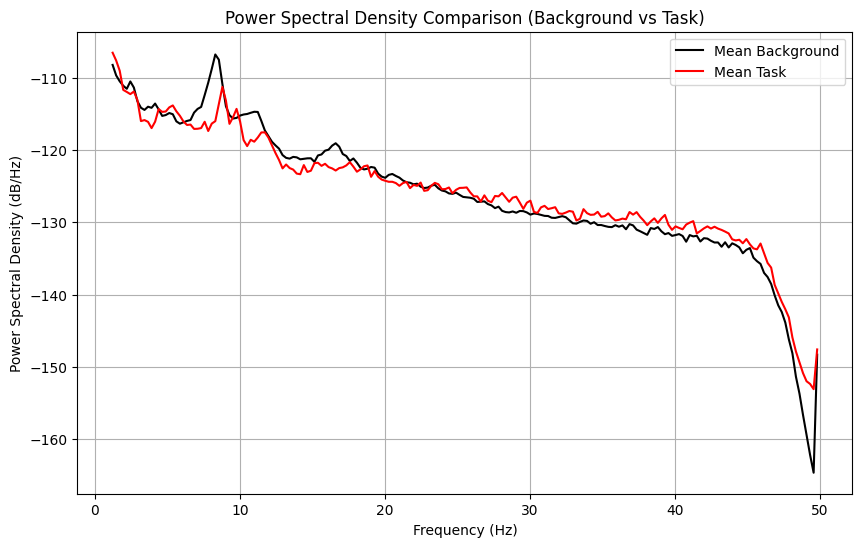

In [17]:
# Compute PSDs for both raw files
psd_0, freqs_0 = raws[0].compute_psd(fmin=1, fmax=50).get_data(return_freqs=True)
psd_1, freqs_1 = raws[1].compute_psd(fmin=1, fmax=50).get_data(return_freqs=True)
psd_2, freqs_2 = raws[2].compute_psd(fmin=1, fmax=50).get_data(return_freqs=True)
psd_3, freqs_3 = raws[3].compute_psd(fmin=1, fmax=50).get_data(return_freqs=True)

# Average across channels for clearer comparison
psd_0_mean = np.mean(psd_0, axis=0)
psd_1_mean = np.mean(psd_1, axis=0)
psd_2_mean = np.mean(psd_2, axis=0)
psd_3_mean = np.mean(psd_3, axis=0)
psd_background_mean = (psd_0_mean + psd_2_mean) / 2
psd_task_mean = (psd_1_mean + psd_3_mean) / 2

# Plot both PSDs on the same plot
plt.figure(figsize=(10, 6))
# plt.plot(freqs_0, 10 * np.log10(psd_0_mean), color='cyan', label='Background (Subject 6)')
# plt.plot(freqs_1, 10 * np.log10(psd_1_mean), color='blue', label='Task (Subject 6)')
# plt.plot(freqs_1, 10 * np.log10(psd_2_mean), color='magenta', label='Background (Subject 7)')
# plt.plot(freqs_1, 10 * np.log10(psd_3_mean), color='purple', label='Task (Subject 7)')
plt.plot(freqs_1, 10 * np.log10(psd_background_mean), color='black', label='Mean Background')
plt.plot(freqs_1, 10 * np.log10(psd_task_mean), color='red', label='Mean Task')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('Power Spectral Density Comparison (Background vs Task)')
plt.legend()
plt.grid(True)
plt.show()


This last plot is to clearly show the difference between the mean background and mean tasks recorded from all channels from both patients. From what we have discussed before, we can validate that it seems that higher frequencies (associated with cognitive demanding tasks) need more power for completing the tasks in comparison to the background.

### Overall Thoughts and Conclusions
Lastly I want to mention that subject 6 was an 18 year old male with 4.35 (SD) number of subtractions while subject 7 was a 18 year old female with 13.38 (SD) number of subtractions. From this we can tell that subject 7 did better on the tasks and from what we can tell from these two subjects and the plots is that subject 7 had more drastic amplitude changes than subject 6. Also subject 7 had more of the right frontal lobe active vs subject 6's left frontal lobe. Also the activation of subject 7's right frontal lobe was way more drastic in the higher frequencies vs subject 6's left frontal lobe activation. I think the main difference here is that subject 7 was more comfortable in doing math and therefore was easier to compute the problems in there frontal lobe in comparison to subject 6 which had to rely on other parts of the brain, potentially feeling more emotions (like panicing about being confused about some of the problems), because they were not as familiar with doing those types of math computations.

# Q2)
## Plot the spectrogram for the two conditions (background and task). Discuss the main differences between the two groups.
There are 21 channels of which there are 4 different files to observe. So what I am going to do is pick 5 channels from different sections of the brain near the center (Fp1, Fz, Cz, Pz, & O1) to analyze given the 4 different files (subject 6 background, subject 6 task, subject 7 background, subject 7 task). This will reduce the number of plots analyzed from 84 to 20 without lossing to much insight.

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


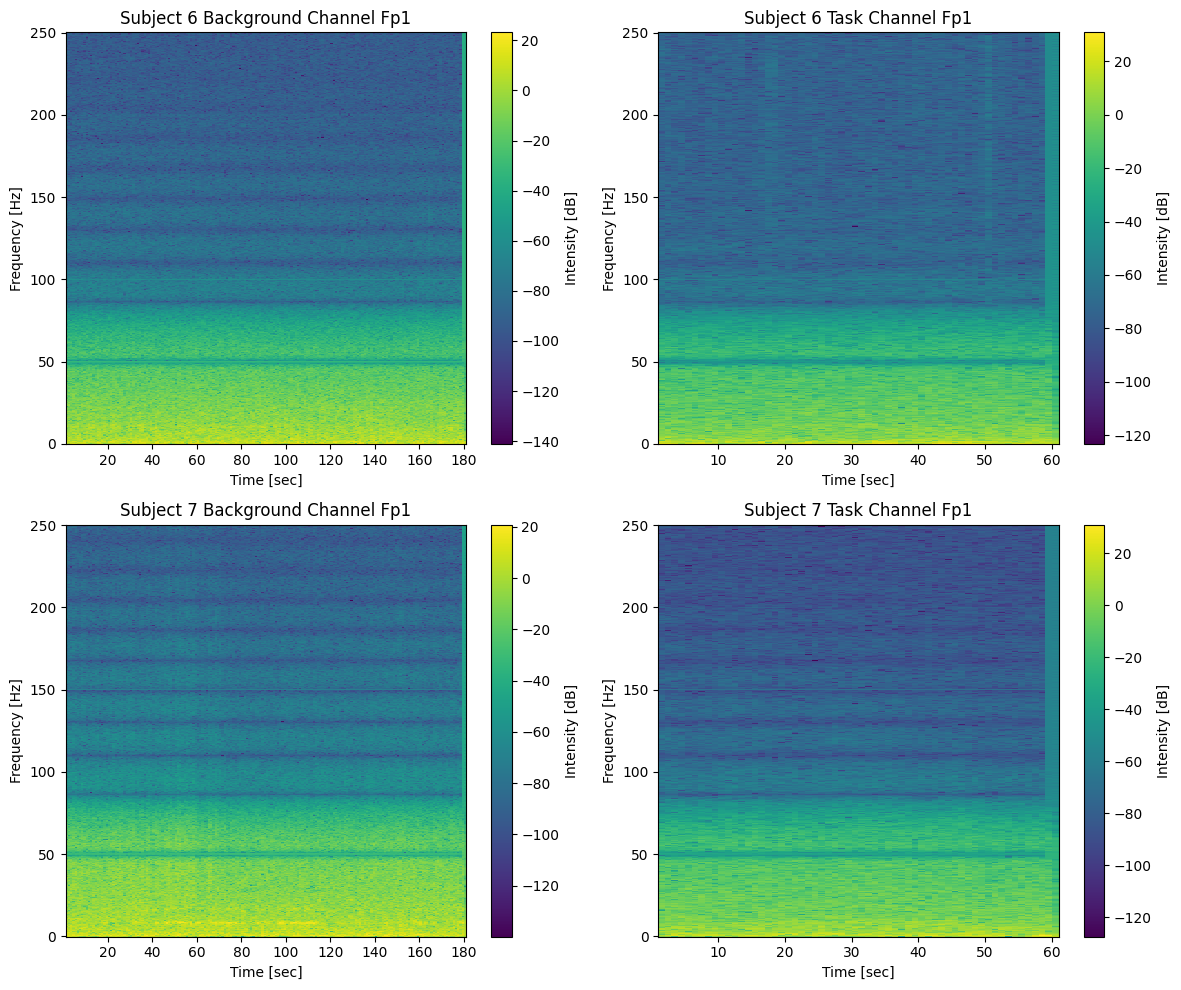

In [45]:
def plot_spectrogram(raws, channel_name):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    for r in range(2):
        for c in range(2):
            raw = raws[2*r+c]
            raw_copy = raw.copy() # avoid deletion of other channels through copying raw
            raw_copy.pick_channels([channel_name])
            eeg_data = raw_copy.get_data()[0]  # Shape is (n_channels, n_times)
            sfreq = raw_copy.info['sfreq']  # Sampling frequency

            # Compute spectrogram for the first channel (e.g., Fz)
            f, t, Sxx = sp.signal.spectrogram(eeg_data, fs=sfreq, window=('hann'),
                                            nperseg=1500, noverlap=1000, scaling='density', mode='psd')

            pcm = axs[r, c].pcolormesh(t, f, 10*np.log10(Sxx*1e6**2), cmap='viridis')
            axs[r, c].set_ylabel('Frequency [Hz]')
            axs[r, c].set_xlabel('Time [sec]')
            axs[r, c].set_title('rizz')

            title = ''
            if 2*r+c == 0:
                title = 'Subject 6 Background'
            if 2*r+c == 1:
                title = 'Subject 6 Task'
            if 2*r+c == 2:
                title = 'Subject 7 Background'
            if 2*r+c == 3:
                title = 'Subject 7 Task'

            axs[r, c].set_title(f'{title} Channel {channel_name}')
            plt.colorbar(pcm).set_label('Intensity [dB]')

        
    plt.tight_layout()
    plt.show()

# print(raws[0].ch_names)
# print(raws[1].ch_names)
# print(raws[2].ch_names)
# print(raws[3].ch_names)
plot_spectrogram(raws, 'Fp1')

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


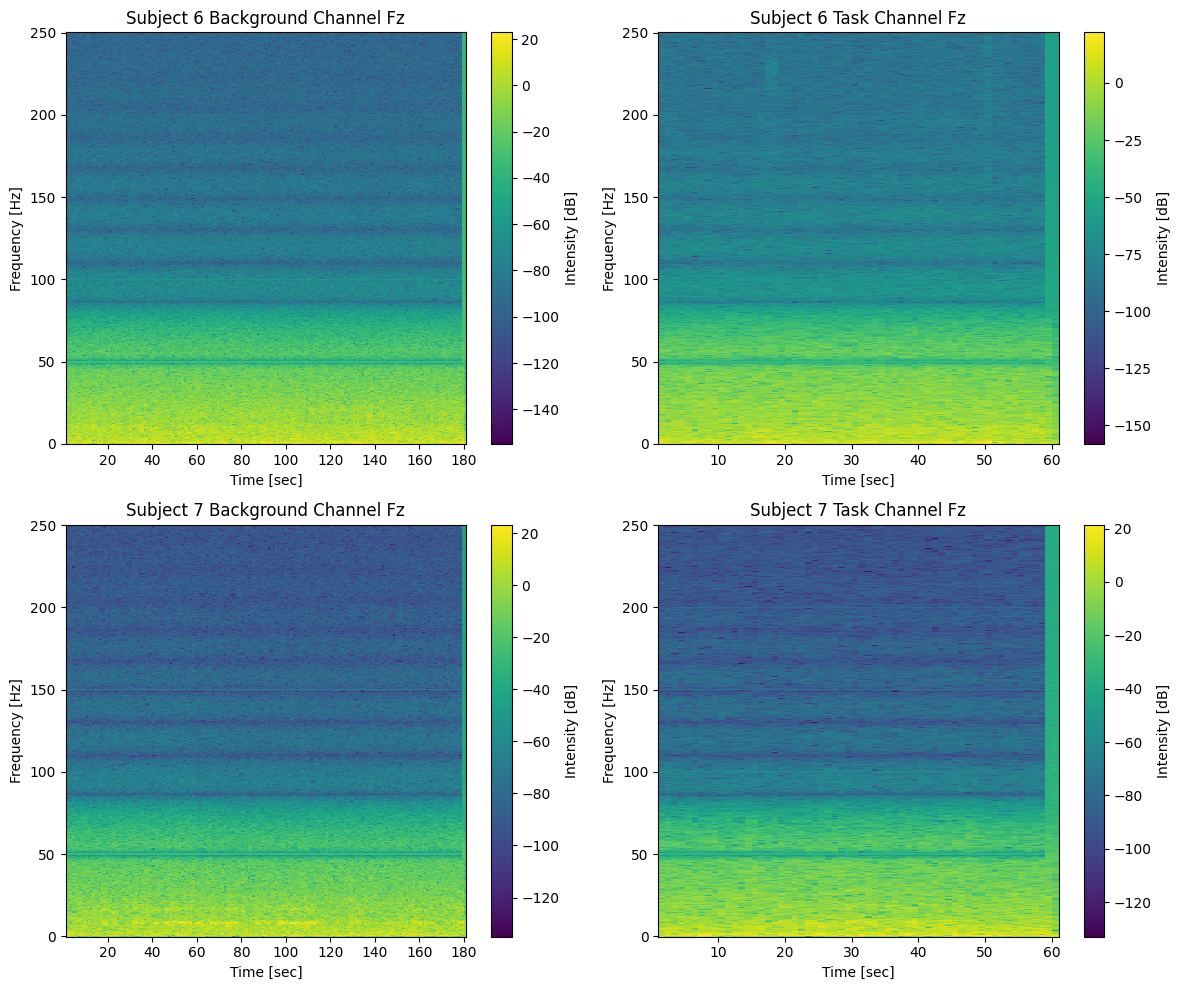

In [46]:
plot_spectrogram(raws, 'Fz')

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


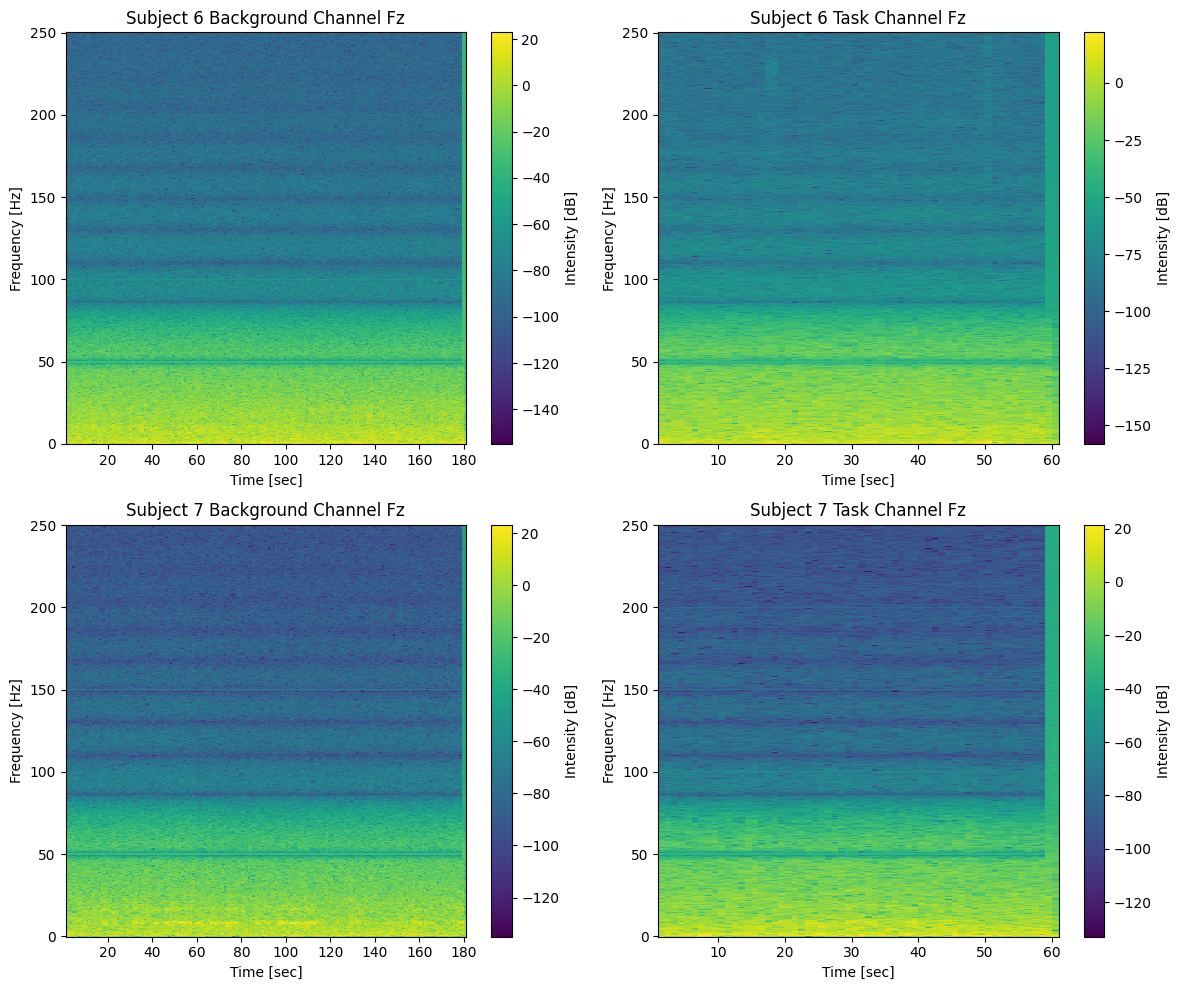

In [47]:
plot_spectrogram(raws, 'Fz')

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


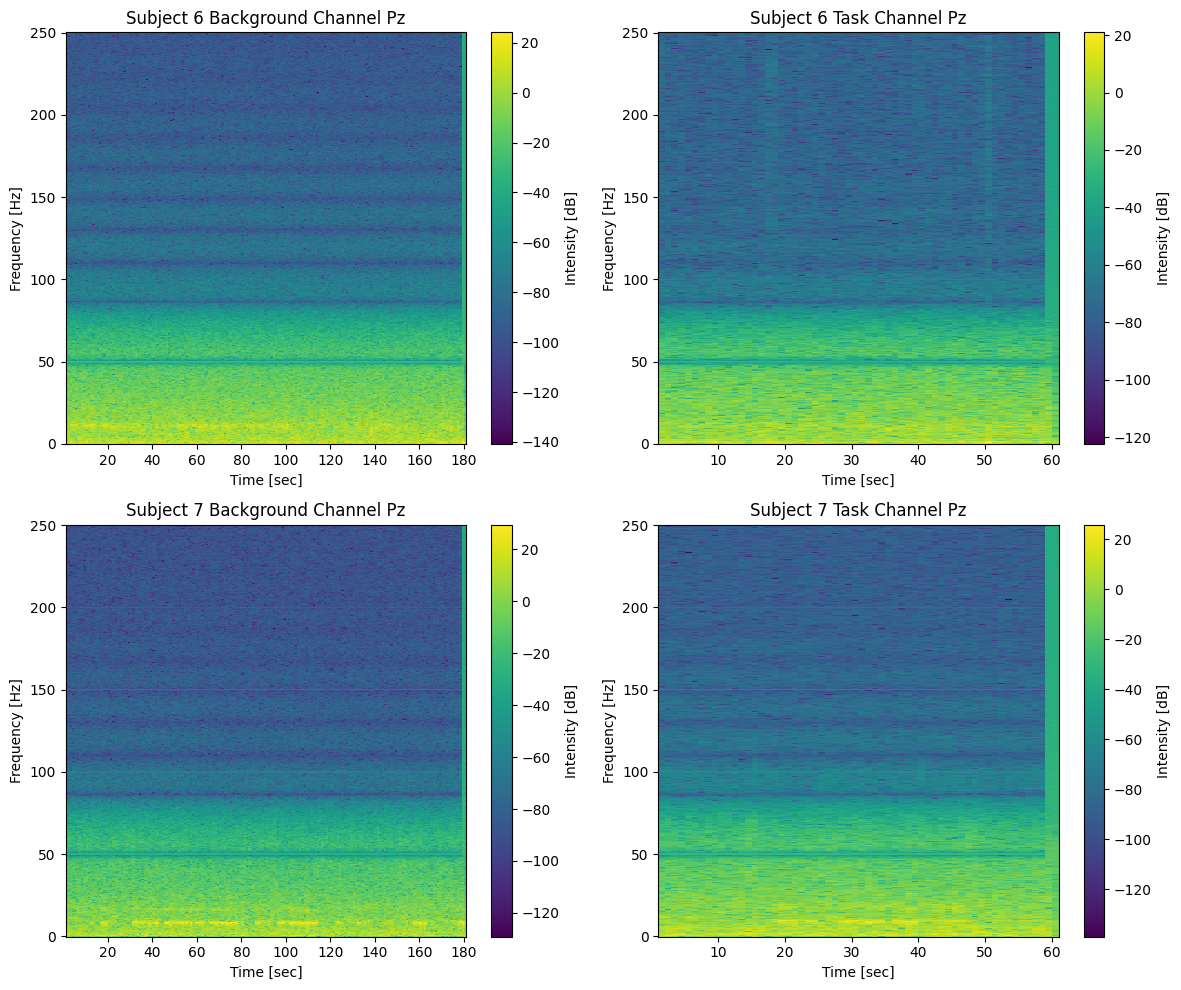

In [48]:
plot_spectrogram(raws, 'Pz')

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


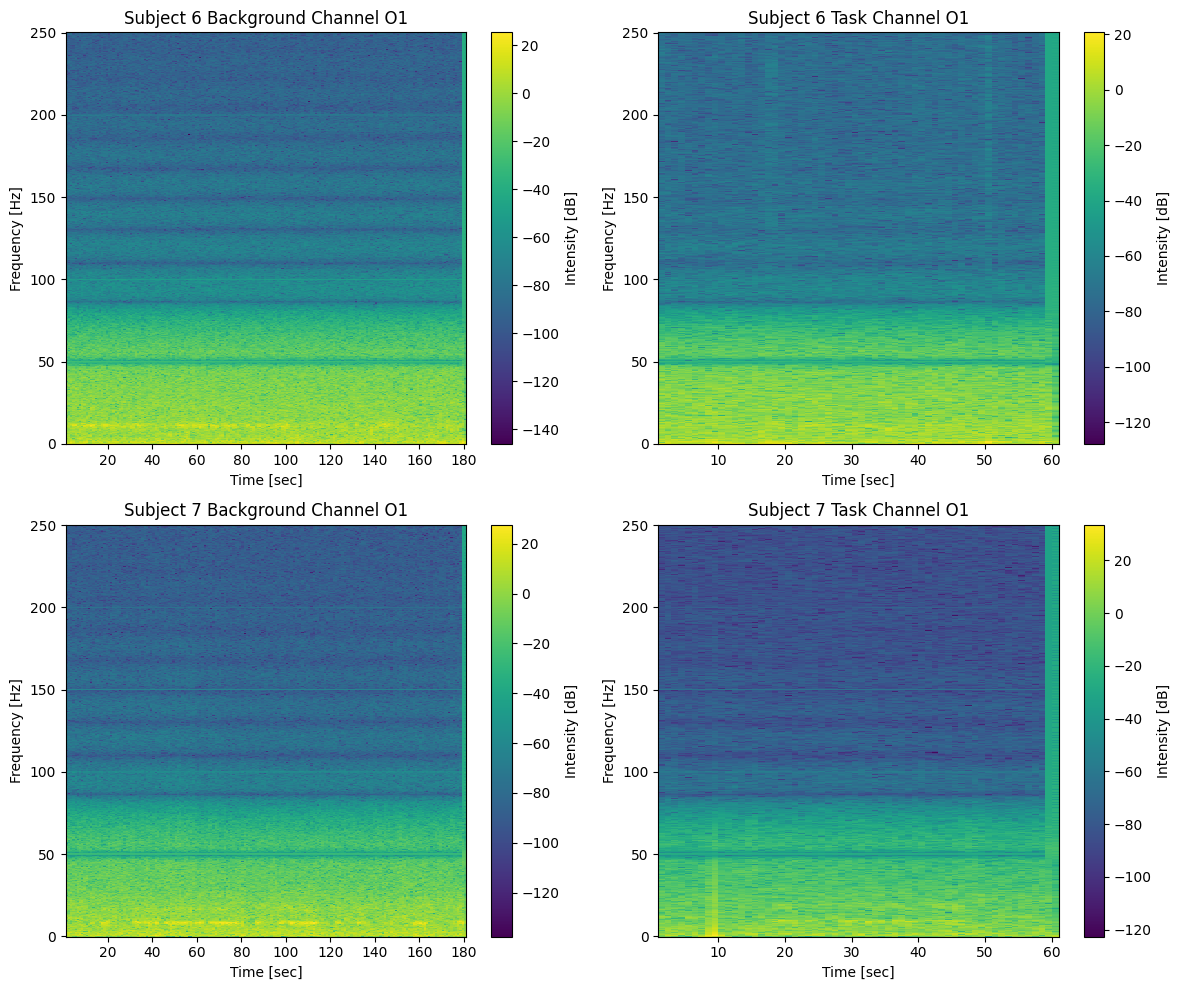

In [49]:
plot_spectrogram(raws, 'O1')

# Q3)
## Plot the time domain signal in Alpha band (8-12 Hz) for the two conditions (background and task). Discuss the main differences between the two groups.

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


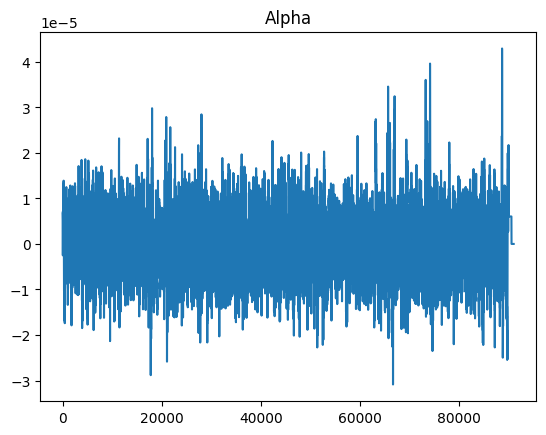

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


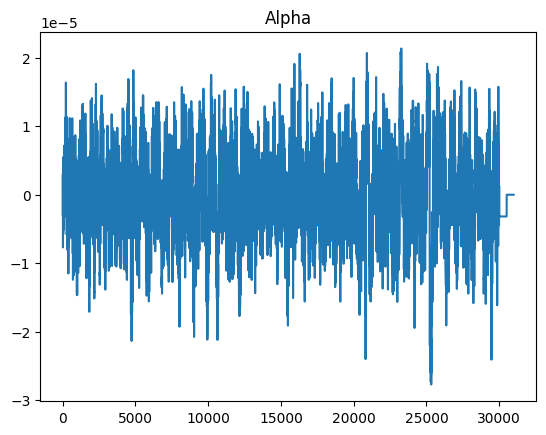

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


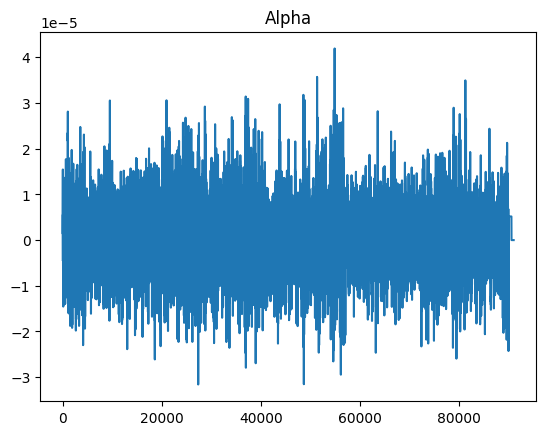

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


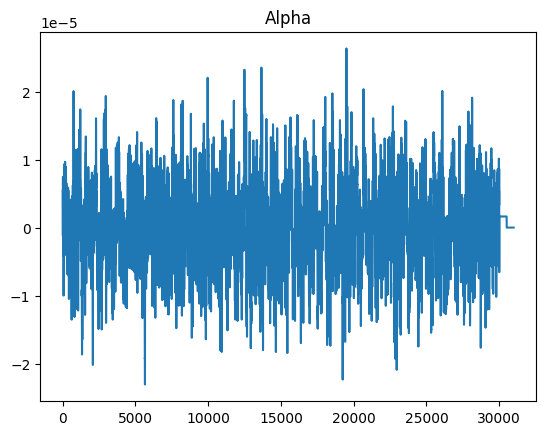

In [53]:
# TODO make the plots more detailed
# Let us explore some frequency bands
def alpha_band_plot():
    for raw in raws:
        # bandpass filter
        raw.copy().filter(8, 12, l_trans_bandwidth=1, h_trans_bandwidth=1)
        # make sure filter params are the same
        plt.plot(raw._data[10,:])
        # TODO NOTE measure ments are 500 units every second
        plt.title('Alpha')
        plt.show()

alpha_band_plot()

# Q4)
## Plot the topomap of average power spectral density in the alpha band (8-12 Hz) for the two conditions (background and task). Discuss the differences between the two conditions.

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 825 samples (1.650 s)

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


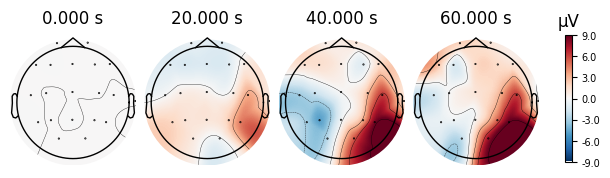

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 825 samples (1.650 s)

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


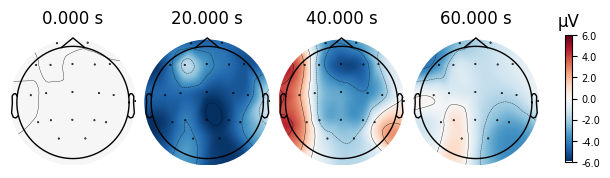

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 825 samples (1.650 s)

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


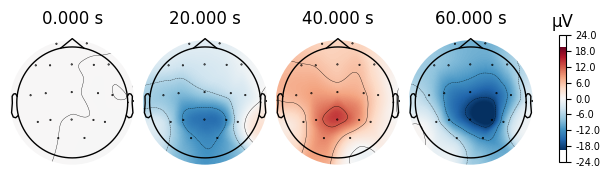

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 825 samples (1.650 s)

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


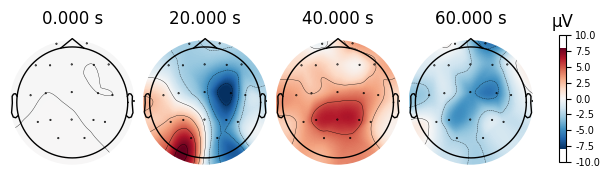

<Figure size 640x480 with 0 Axes>

In [57]:
# TODO Clean up this plot
def topomap_alpha_band_plot():
    c = 0
    for raw in raws:
        # 
        if c % 2 == 0:
            duration = 180
        else:
            duration = 60

        filtered = raw.copy().filter(8, 12)
    
        # Now create epochs from the filtered raw data (you can adjust the tmin and tmax to define epoch duration)
        events = mne.make_fixed_length_events(filtered, duration=duration)  # 2 seconds long epochs
        epochs = mne.Epochs(filtered, events, tmin=0, tmax=60.0, baseline=None)
        
        # Average the epochs to create an evoked object
        evoked = epochs.average()
        
        # Plot the topomap for the average data in this frequency band
        evoked.plot_topomap()
        c+=1

    # Show the plot with all the frequency bands
    plt.suptitle("Topomap for All Frequency Bands")
    plt.tight_layout()
    plt.show()

topomap_alpha_band_plot()